In [7]:
import pandas as pd




In [9]:
import json
import requests
import pandas as pd   


from scipy import fftpack
import matplotlib.pyplot as plt
import numpy as np
from websocket import create_connection,WebSocket

import time





In [92]:


def pullStats(uri):
    
    
    
    ws = create_connection(uri)

    sysstats = json.loads(ws.recv())["data"]
    ms = json.loads(ws.recv())["data"]
    cs = json.loads(ws.recv())["data"]
    ws.close()



    
    if len(ms)>0:
        df = pd.DataFrame(ms)
    else:
        df = pd.DataFrame([{}],columns=["dur","date"])
    
    df["date"] = pd.to_datetime(df["date"],unit="s")
    df = df.set_index("date")
    dfm = df.copy()

    # camera frame
    if len(cs)>0:
        df = pd.DataFrame(cs)
        df["date"] = pd.to_datetime(df["triggerDate"],unit="s")
        df = df.drop(columns=["triggerDate"])

        dfup = pd.json_normalize(df["usedParams"])
        dfup = dfup.rename(columns={ c:"up_"+c for c in dfup.columns})
        df = df.join(dfup)
        df = df.drop(columns=["usedParams"])
        

        dfc = df.copy()
    else:
        dfc = None
    
    return dfm,dfc,sysstats


<AxesSubplot:xlabel='date'>

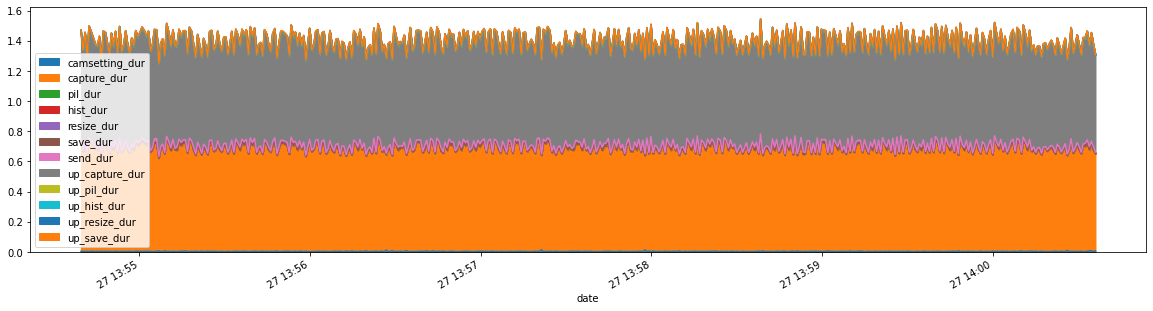

In [95]:

uri = "ws://192.168.1.85:8765/stats"


dfm,dfc,sysstats = pullStats(uri)


durcols = [c for c in dfc.columns if "_dur" in c]
dfc.tail(500).set_index("date")[durcols].plot.area(figsize=(20,5))

In [89]:
dfc

,camsetting_dur,capture_dur,pil_dur,hist_dur,resize_dur,save_dur,send_dur,usedParams,date
0,0.004615,0.660318,0.002741,9.536743e-07,0.002198,0.000242,0.006374,"{'triggerDate': 1616852571.0962622, 'gains': [...",2021-03-27 13:42:51.096262144
1,0.002047,0.675646,0.005409,2.861023e-06,0.004717,0.000426,0.016014,"{'triggerDate': 1616852571.7741697, 'gains': [...",2021-03-27 13:42:51.774169600
2,0.002966,0.648954,0.002747,9.536743e-07,0.002208,0.000242,0.006447,"{'triggerDate': 1616852572.4860253, 'gains': [...",2021-03-27 13:42:52.486025216
3,0.002069,0.668793,0.002725,1.192093e-06,0.002203,0.000244,0.008442,"{'triggerDate': 1616852573.1525052, 'gains': [...",2021-03-27 13:42:53.152505088
4,0.003317,0.692613,0.005688,2.861023e-06,0.004955,0.000447,0.016320,"{'triggerDate': 1616852573.8432696, 'gains': [...",2021-03-27 13:42:53.843269632
...,...,...,...,...,...,...,...,...,...
995,0.003839,0.659844,0.002640,9.536743e-07,0.002241,0.000240,0.006374,"{'triggerDate': 1616853280.2668834, 'gains': [...",2021-03-27 13:54:40.266883328
996,0.001979,0.708086,0.005725,2.622604e-06,0.005091,0.000433,0.016295,"{'triggerDate': 1616853280.9451451, 'gains': [...",2021-03-27 13:54:40.945145088
997,0.003913,0.639939,0.002667,9.536743e-07,0.002237,0.000238,0.006339,"{'triggerDate': 1616853281.6962082, 'gains': [...",2021-03-27 13:54:41.696208128
998,0.002050,0.730406,0.005491,2.861023e-06,0.004700,0.000426,0.014904,"{'triggerDate': 1616853282.3538504, 'gains': [...",2021-03-27 13:54:42.353850368


,camsetting_dur,capture_dur,pil_dur,hist_dur,resize_dur,save_dur,send_dur,usedParams,date,up_triggerDate,...,up_capture_dur,up_pil_dur,up_hist_dur,up_resize_dur,up_save_dur,up_capture_format,up_save_format,up_save_section,up_fdest,up_fileNameExt
0,0.004615,0.660318,0.002741,9.536743e-07,0.002198,0.000242,0.006374,"{'triggerDate': 1616852571.0962622, 'gains': [...",2021-03-27 13:42:51.096262144,1.616853e+09,...,0.660318,0.002741,9.536743e-07,0.002198,0.000242,rgb,none,test,none,none
1,0.002047,0.675646,0.005409,2.861023e-06,0.004717,0.000426,0.016014,"{'triggerDate': 1616852571.7741697, 'gains': [...",2021-03-27 13:42:51.774169600,1.616853e+09,...,0.675646,0.005409,2.861023e-06,0.004717,0.000426,rgb,none,test,none,none
2,0.002966,0.648954,0.002747,9.536743e-07,0.002208,0.000242,0.006447,"{'triggerDate': 1616852572.4860253, 'gains': [...",2021-03-27 13:42:52.486025216,1.616853e+09,...,0.648954,0.002747,9.536743e-07,0.002208,0.000242,rgb,none,test,none,none
3,0.002069,0.668793,0.002725,1.192093e-06,0.002203,0.000244,0.008442,"{'triggerDate': 1616852573.1525052, 'gains': [...",2021-03-27 13:42:53.152505088,1.616853e+09,...,0.668793,0.002725,1.192093e-06,0.002203,0.000244,rgb,none,test,none,none
4,0.003317,0.692613,0.005688,2.861023e-06,0.004955,0.000447,0.016320,"{'triggerDate': 1616852573.8432696, 'gains': [...",2021-03-27 13:42:53.843269632,1.616853e+09,...,0.692613,0.005688,2.861023e-06,0.004955,0.000447,rgb,none,test,none,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.003839,0.659844,0.002640,9.536743e-07,0.002241,0.000240,0.006374,"{'triggerDate': 1616853280.2668834, 'gains': [...",2021-03-27 13:54:40.266883328,1.616853e+09,...,0.659844,0.002640,9.536743e-07,0.002241,0.000240,rgb,none,test,none,none
996,0.001979,0.708086,0.005725,2.622604e-06,0.005091,0.000433,0.016295,"{'triggerDate': 1616853280.9451451, 'gains': [...",2021-03-27 13:54:40.945145088,1.616853e+09,...,0.708086,0.005725,2.622604e-06,0.005091,0.000433,rgb,none,test,none,none
997,0.003913,0.639939,0.002667,9.536743e-07,0.002237,0.000238,0.006339,"{'triggerDate': 1616853281.6962082, 'gains': [...",2021-03-27 13:54:41.696208128,1.616853e+09,...,0.639939,0.002667,9.536743e-07,0.002237,0.000238,rgb,none,test,none,none
998,0.002050,0.730406,0.005491,2.861023e-06,0.004700,0.000426,0.014904,"{'triggerDate': 1616853282.3538504, 'gains': [...",2021-03-27 13:54:42.353850368,1.616853e+09,...,0.730406,0.005491,2.861023e-06,0.004700,0.000426,rgb,none,test,none,none


,up_triggerDate,up_gains,up_analog_gain,up_iso,up_brightness,up_saturation,up_contrast,up_exposure_compensation,up_resolution,up_imageSize,...,up_capture_dur,up_pil_dur,up_hist_dur,up_resize_dur,up_save_dur,up_capture_format,up_save_format,up_save_section,up_fdest,up_fileNameExt
0,1.616852e+09,"[1.0, 1.0]",1.0,100,50,0,0,0,"[480, 368]","[480, 368]",...,0.546057,0.002451,1.192093e-06,0.003108,0.000833,rgb,none,test,none,none
1,1.616852e+09,"[1.0, 1.0]",1.0,100,50,0,0,0,"[480, 368]","[480, 368]",...,0.697239,0.005222,2.622604e-06,0.004609,0.000422,rgb,none,test,none,none
2,1.616852e+09,"[1.0, 1.0]",1.0,100,50,0,0,0,"[480, 368]","[480, 368]",...,0.717570,0.002656,1.192093e-06,0.002182,0.000242,rgb,none,test,none,none
3,1.616852e+09,"[1.0, 1.0]",1.0,100,50,0,0,0,"[480, 368]","[480, 368]",...,0.669916,0.004642,2.145767e-06,0.004073,0.000383,rgb,none,test,none,none
4,1.616852e+09,"[1.0, 1.0]",1.0,100,50,0,0,0,"[480, 368]","[480, 368]",...,0.717843,0.005198,2.622604e-06,0.004770,0.000431,rgb,none,test,none,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,1.616853e+09,"[1.0, 1.0]",1.0,100,50,0,0,0,"[480, 368]","[480, 368]",...,0.713970,0.005235,2.384186e-06,0.004608,0.000390,rgb,none,test,none,none
782,1.616853e+09,"[1.0, 1.0]",1.0,100,50,0,0,0,"[480, 368]","[480, 368]",...,0.647861,0.002765,9.536743e-07,0.002173,0.000241,rgb,none,test,none,none
783,1.616853e+09,"[1.0, 1.0]",1.0,100,50,0,0,0,"[480, 368]","[480, 368]",...,0.740685,0.005689,3.099442e-06,0.004655,0.000427,rgb,none,test,none,none
784,1.616853e+09,"[1.0, 1.0]",1.0,100,50,0,0,0,"[480, 368]","[480, 368]",...,0.653704,0.002759,9.536743e-07,0.002181,0.000248,rgb,none,test,none,none


In [58]:


uri = "ws://192.168.1.85:8765/stats"


dfm,dfc,sysstats = pullStats(uri)
dfm.drop(columns=["rspd"]).plot(figsize=(20,10))
dfc.tail(500).plot.area(figsize=(20,5))
len(dfm)

KeyError: "['rspd'] not found in axis"

'var 0.0064'

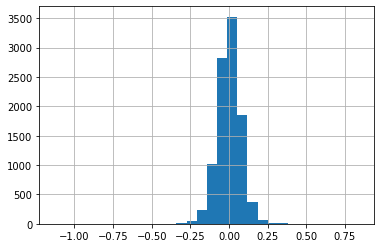

In [86]:
dfm["err"].hist(bins=30)
"var %.4f"%dfm["err"].var()

In [87]:
"revar1?? %.3f%%"%(np.abs(dfm["err"].var()/dfm["ts"].mean())*100)

'revar1?? 0.544%'

'revar2?? 2.166%'

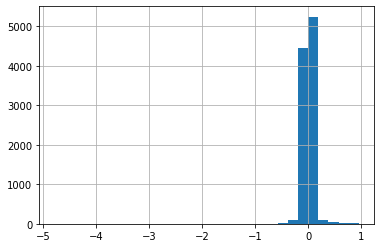

In [88]:

#calculate relative error
dfm["relerrpct"] = ((dfm["err"]/dfm["ts"]))
dfm["relerrpct"].hist(bins=30)
"revar2?? %.3f%%"%(dfm["relerrpct"].var()*100)

Text(0, 0.5, 'Phase')

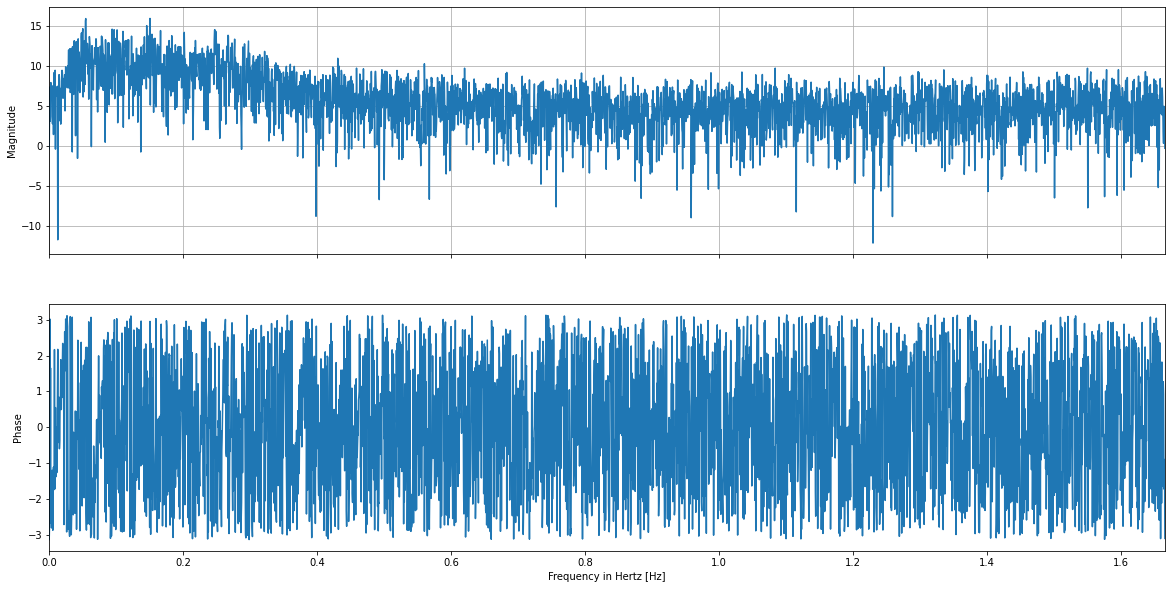

In [89]:

def makeFFT(dfm):
    f_s = 1.0/0.3
    x = dfm.resample('.3S').mean()["err"].values


    X = fftpack.fft(x)
    freqs = fftpack.fftfreq(len(x)) * f_s


    cutat = int(len(X)/2)
    
    return freqs,X,cutat,f_s


freqs,X,cutat,f_s = makeFFT(dfm)




fig, axes = plt.subplots(nrows=2,ncols=1,figsize=(20,10),sharex=True)

#plt.xscale("log")

axm = axes[0]
dolog = True
if dolog:
    t = 10*np.log10(np.abs(X))
else:
    t = np.abs(X)
axm.plot(freqs[:cutat],t[:cutat])

axm.set_ylabel('Magnitude')
axm.grid(True)
axm.set_xlim(0, f_s / 2)

axp = axes[1]
axp.plot(freqs[:cutat], np.angle(X)[:cutat])
axp.set_xlabel('Frequency in Hertz [Hz]')
axp.set_ylabel('Phase')


In [90]:


def makemsg(k,v): return json.dumps({"msgtype":"ctlparams","k":k,"v":v})

def settingTargetSpeed(uri,val):
    print("setting speed to .3f"%val)
    ws = create_connection(uri)
    ws.send(makemsg("T",val))

    ws.close()

def settingPID(uri,P,I,D):
    ws = create_connection(uri)
    ws.send(makemsg("P",P))
    time.sleep(.300)
    ws.send(makemsg("I",I))
    time.sleep(.300)
    ws.send(makemsg("D",D))
    time.sleep(.300)
    ws.close()

,dur
0,NaN


In [30]:
uri = "ws://192.168.1.85:8765/stats"
ws = create_connection(uri)

sysstats = ws.recv()
motorstats = ws.recv()
camstats = ws.recv()
ws.close()

sysstats,motorstats,camstats

('{"msgtype": "sysInfo", "data": [{"total": 28.196147918701172, "used": 2.5538597106933594, "usedpct": 9.057477347817093, "free": 24.466732025146484, "disk": "/"}, {"total": 3.758800506591797, "used": 8.7738037109375e-05, "usedpct": 0.0023342030776975016, "free": 3.7587127685546875, "disk": "/dev/shm"}]}',
 '{"msgtype": "motorstats", "data": []}',
 '{"msgtype": "camstats", "data": [{"triggerDate": 1616852311.0366006, "camsetting_dur": 0.002622842788696289, "capture_dur": 0.5460569858551025, "pil_dur": 0.0024514198303222656, "hist_dur": 1.1920928955078125e-06, "resize_dur": 0.003107786178588867, "save_dur": 0.0008327960968017578, "send_dur": 0.035123586654663086, "usedParams": {"triggerDate": 1616852311.0366006, "gains": [1.0, 1.0], "analog_gain": 1.0, "iso": 100, "brightness": 50, "saturation": 0, "contrast": 0, "exposure_compensation": 0, "resolution": [480, 368], "imageSize": [480, 368], "shutterSpeed": 149999, "exposure_speed": 20000, "exposure_mode": "off", "awb_mode": "off", "capt

In [13]:
data

'{"msgtype": "sysInfo", "data": [{"total": 931.4960899353027, "used": 606.1567573547363, "usedpct": 65.07346234774181, "free": 325.3393325805664, "disk": "/"}, {"total": 931.4960899353027, "used": 606.1567573547363, "usedpct": 65.07346234774181, "free": 325.3393325805664, "disk": "/dev/shm"}]}'

In [29]:
uri = "ws://192.168.1.85:8765"


settingPID(uri,80,20,-15)

settingTargetSpeed(uri,0)

# wait to stabilize
time.sleep(30)


settingTargetSpeed(uri,-1.5)
# wait to stabilize
#time.sleep(60)


# read results

NameError: name 'settingPID' is not defined

In [60]:
settingPID(uri,150,0,0)
# wait to stabilize
time.sleep(30)

In [ ]:
#.resample("1T").mean()

<AxesSubplot:xlabel='date'>

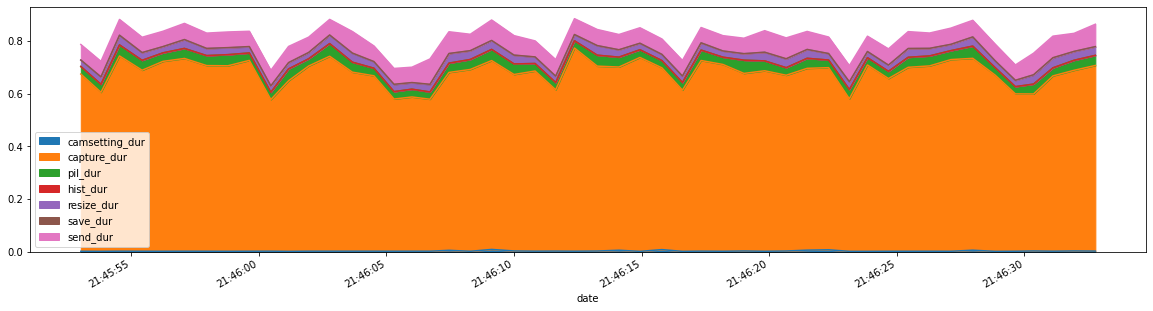

In [38]:
dfc.tail(50).plot.area(figsize=(20,5))
